In [2]:
import json
import gensim
import pandas as pd
import numpy as np
import nltk
nltk.download('popular')
from nltk.stem import WordNetLemmatizer

with open('full_format_recipes.json') as f:
  data = json.load(f)

data = pd.DataFrame.from_dict(data, orient='columns')
data.shape

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

(20130, 11)

In [3]:
### drop rows with no ingredients list and no recipes
data.dropna(axis = 0, subset = ['ingredients', 'directions'], inplace = True)
data.shape

(20111, 11)

In [4]:
idx = np.random.rand(len(data)) < 0.8

train_data = data.iloc[idx]
validation_data = data.iloc[~idx]

print(len(train_data), len(validation_data))

16108 4003


In [0]:
### common measures used
measures= np.array(['liter','millilitres','mL','grams','g', 'kg','teaspoon',
          'tsp', 'tablespoon','tbsp','fluid', 'ounce','oz','fl.oz', 'cup','pint','pt',
          'quart','qt','gallon','gal','smidgen','drop','pinch','dash','scruple',
          'dessertspoon','teacup','cup','c','pottle','gill','dram','wineglass','coffeespoon',
          'pound','pounded','lb','tbsp','plus','firmly', 'packed','lightly','level','even',
          'rounded','heaping','heaped','sifted','bushel','peck','stick','chopped','sliced',
          'halves', 'shredded','slivered','sliced','whole','paste','whole',' fresh', 'peeled', 
          'diced','mashed','dried','frozen','fresh','peeled','candied','no', 'pulp','crystallized',
          'canned','crushed','minced','julienned','clove','head', 'small','large','medium', 'torn', 'cleaned', 'degree'])

lemmatizer = WordNetLemmatizer()
measures = np.array([lemmatizer.lemmatize(m) for m in measures])

In [0]:
### make a list of ingredients present in the given recipes

meal_ingredients = []

for ingredient in train_data['ingredients']:
    for ingr in ingredient:
      simp_ingr = ""
      tokens = nltk.word_tokenize(ingr.strip())
      tokens = [token for token in tokens if token.isalpha()]
      tokens = [lemmatizer.lemmatize(token) for token in tokens]
      tokens = [token for token in tokens if token not in measures]
      pos_tokens = nltk.pos_tag(tokens)
      for tok, tag in pos_tokens:
          if tag.startswith("N"):
              simp_ingr += tok.lower() + " "
      simp_ingr = simp_ingr[:-1]
      if simp_ingr:
        meal_ingredients.append(simp_ingr)

In [7]:
print(meal_ingredients[:50])

['stock', 'brown lentil', 'lentil', 'stalk celery', 'carrot', 'sprig thyme', 'kosher salt', 'tomato', 'fuji apple', 'lemon juice', 'oil', 'ground pepper', 'sheet cut crosswise flour tortilla', 'turkey breast', 'bibb lettuce', 'cream', 'onion', 'salt', 'bay leaf', 'garlic', 'pepper', 'ground nutmeg', 'pinch thyme', 'shallot', 'butter', 'boneless center pork sinew cut chunk', 'egg', 'flour', 'tawny port', 'currant', 'lettuce leaf', 'peppercorn', 'minced parsley', 'bay leaf', 'bread baguette slice', 'oil', 'onion', 'currant', 'wine vinegar', 'chicken broth', 'thyme', 'sugar', 'fennel bulb anise stalk bulb cut dice feathery leaf garnish', 'onion', 'butter', 'russet baking potato', 'chicken broth', 'milk', 'oil', 'onion']


In [8]:
### Bag of Words Model

model = gensim.models.Word2Vec(min_count = 1,  
                              size = 100, window = 5) 
model.build_vocab(meal_ingredients)
model.train(meal_ingredients, total_examples = model.corpus_count, 
            epochs=100, report_delay=1)

(29382097, 169443700)

In [9]:
## vectors for all the words

X = model[model.wv.vocab]

X.shape

### Why does it get so reduced???

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49, 100)

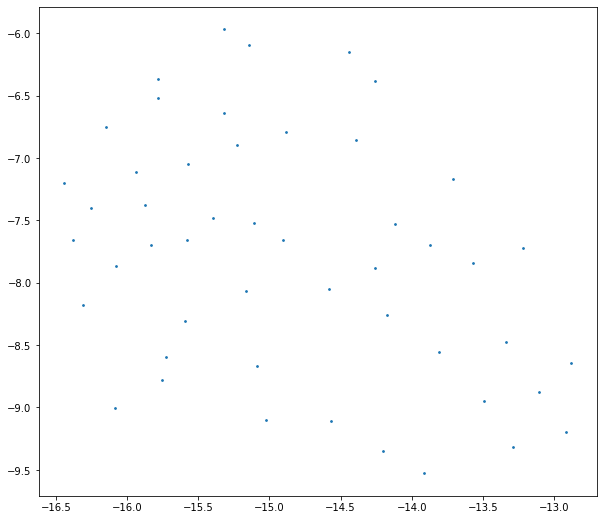

In [11]:
import umap
import matplotlib.pyplot as plt

##### Visualisation
##### The ingredients do not cluster!!

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [16]:
model.most_similar(positive=['apple'], topn= 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored